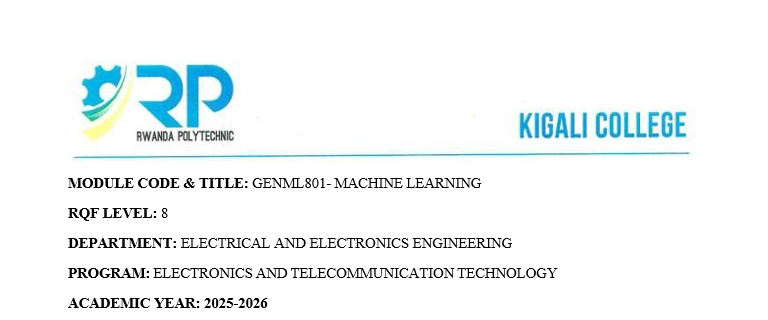

##### NAME:NDAHABONIMANA DANIEL
##### REG:25RP18098
## TOPIC:Tenant Monitoring and Rent Payment Prediction System Using Multiple Regression

# Individual assignment: Applying EDA and Feature Engineering on a Dataset 

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


# 1. Load Dataset

In [3]:
data = pd.read_csv("House_Rent_Dataset.csv")
print("Dataset Loaded. Shape:", data.shape)
print(data.head())


Dataset Loaded. Shape: (4746, 12)
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Ow

# 2. Exploratory Data Analysis (EDA)
## Histograms

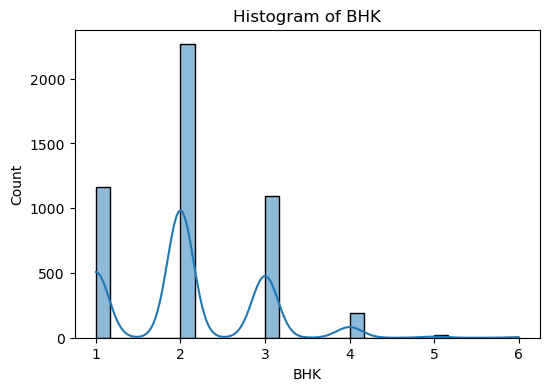

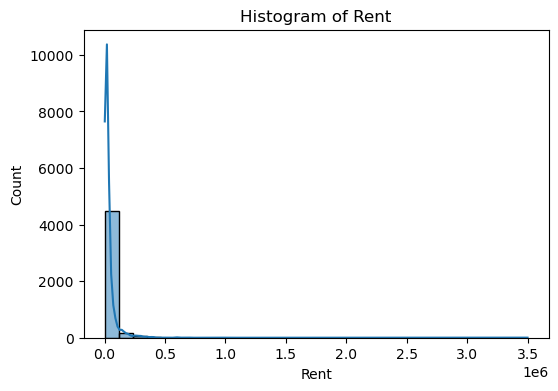

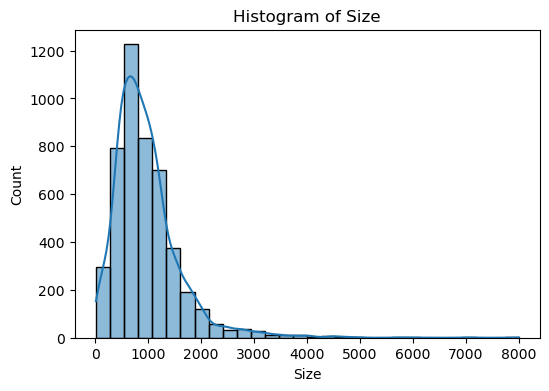

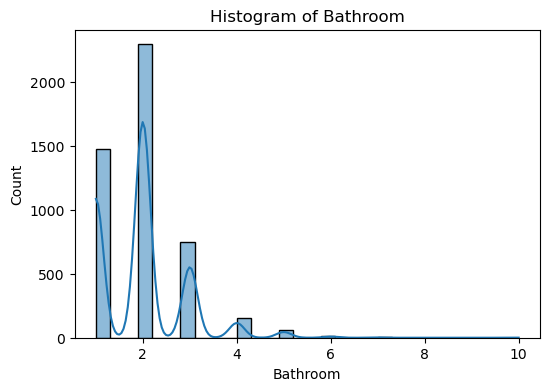

In [4]:

numeric_cols = data.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()


# Scatter plot example (Size vs Rent)

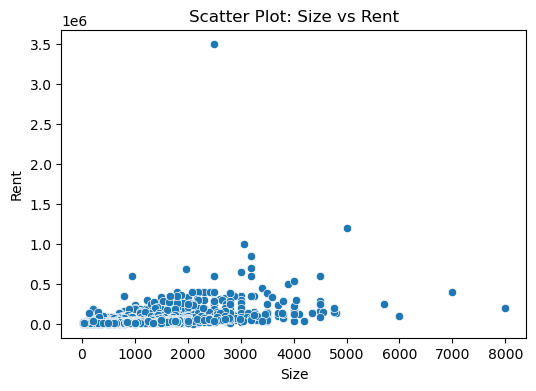

In [5]:

plt.figure(figsize=(6,4))
sns.scatterplot(x=data['Size'], y=data['Rent'])
plt.title("Scatter Plot: Size vs Rent")
plt.show()

# 3. Feature Selection

In [6]:

X = data.drop(columns=['Rent'])  # Features
y = data['Rent']                 # Target

# Identify categorical and numerical columns

In [7]:

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns

# 4. Preprocessing

In [8]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# 5. Pipeline with preprocessing + model

In [9]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [10]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

# 6. Train-test split

In [11]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model

In [12]:

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['BHK', 'Size', 'Bathroom'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object'))])),
                ('model', LinearRegression())])

# 8. Predictions

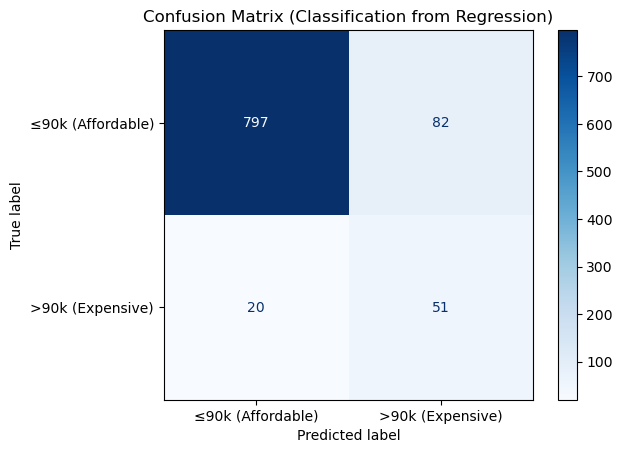

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = pipeline.predict(X_test)
# --- Confusion Matrix (Convert to Classification) ---
# Threshold for "affordable vs expensive"
threshold = 90000

y_test_class = (y_test > threshold).astype(int)   # 0 = affordable, 1 = expensive
y_pred_class = (y_pred > threshold).astype(int)

cm = confusion_matrix(y_test_class, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["≤90k (Affordable)", ">90k (Expensive)"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Classification from Regression)")
plt.show()

# 9. Evaluation

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

 # 11. Test Scenario for Tenant Monitoring and Rent Payment Prediction

In [ ]:

input_data= pd.DataFrame({
    'BHK': [2],
    'Size': [950],
    'Bathroom': [2],
    'Furnishing Status': ['Semi-Furnished'],
    'Tenant Preferred': ['Bachelors/Family'],
    'City': ['Mumbai'],
    'Point of Contact': ['Contact Owner'],
    'Area Locality': ['Andheri West'],    # example locality
    'Posted On': ['2025-01-15'],          # sample date
    'Area Type': ['Super Area'],          # must be included
    'Floor': ['5 out of 10']              # must be included
})

prediction = pipeline.predict(input_data)
predicted_rent = prediction[0]

print("Predicted Rent Payment:", predicted_rent)

if predicted_rent > 90000:  
    print("⚠️ Tenant may struggle to pay on time (high rent).")
else:
    print("✅ Tenant is likely to pay rent on time.") 
   

### Saving the trained model

In [ ]:
import pickle

filename='tenant_model.sav'
pickle.dump(pipeline, open (filename, 'wb'))

# loading the saved model

In [ ]:

loaded_model = pickle.load(open('tenant_model.sav', 'rb'))

In [ ]:
input_data = pd.DataFrame({
    'BHK': [2],
    'Size': [950],
    'Bathroom': [2],
    'Furnishing Status': ['Semi-Furnished'],
    'Tenant Preferred': ['Bachelors/Family'],
    'City': ['Mumbai'],
    'Point of Contact': ['Contact Owner'],
    'Area Locality': ['Andheri West'],    # example locality
    'Posted On': ['2025-01-15'],          # sample date
    'Area Type': ['Super Area'],          # must be included
    'Floor': ['5 out of 10']              # must be included
})

prediction =loaded_model.predict(input_data)
predicted_rent = prediction[0]

print("Predicted Rent Payment:", predicted_rent)

# Scenario logic 
if predicted_rent > 90000:  
    print("⚠️ Tenant may struggle to pay on time (high rent).")
else:
    print("✅ Tenant is likely to pay rent on time.")